<p align="right">David Rodríguez Elipe</p>

# Logistic Regression Concept
A logistic regression is a prediction algorithm that weigths input parameteres into a single output. It is used to predict a model with multiple input data and specific output values.

$$\displaystyle Y_{i}\ \sim B(p_{i},n_{i}),{\text{ for }}i=1,\dots ,m$$
![decision function](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [232]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.linear_model import LogisticRegression

<AxesSubplot:>

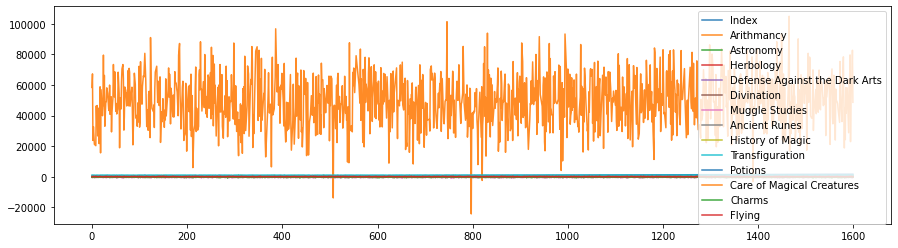

In [233]:
df = pd.read_csv('./datasets/dataset_train.csv')
df_bckp = df.copy()
df = df.dropna()
df.plot(figsize=(15,4), alpha=0.9)

# Data preprocessing
Non-numeric values need to be converted. Unnecessary features can be dropped.

In [234]:
df.iloc[0:,2:6]

,First Name,Last Name,Birthday,Best Hand
0,Tamara,Hsu,2000-03-30,Left
1,Erich,Paredes,1999-10-14,Right
2,Stephany,Braun,1999-11-03,Left
3,Vesta,Mcmichael,2000-08-19,Left
5,Corrine,Hammond,1999-04-04,Right
...,...,...,...,...
1595,Jung,Blank,2001-09-14,Right
1596,Shelli,Lock,1998-03-12,Left
1597,Benjamin,Christensen,1999-10-24,Right
1598,Charlotte,Dillon,2001-09-21,Left


In [235]:
mapping_dict = {'Left':0,
                'Right':1}
df['Best Hand'] = df['Best Hand'].map(mapping_dict)
df['Birthday'] = df['Birthday'].str.replace('-','').astype(int)


In [236]:
df.iloc[0:,2:6]

,First Name,Last Name,Birthday,Best Hand
0,Tamara,Hsu,20000330,0
1,Erich,Paredes,19991014,1
2,Stephany,Braun,19991103,0
3,Vesta,Mcmichael,20000819,0
5,Corrine,Hammond,19990404,1
...,...,...,...,...
1595,Jung,Blank,20010914,1
1596,Shelli,Lock,19980312,0
1597,Benjamin,Christensen,19991024,1
1598,Charlotte,Dillon,20010921,0


In [237]:
def normalize(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [238]:
df.iloc[0:,6:] = normalize(df.iloc[0:,6:])
df['Birthday'] = df['Birthday'] / 10000 # extracting just the year
df['Birthday'] = df['Birthday'].astype(int)
#df.iloc[0:,4:5] = normalize(df.iloc[0:,4:5])


In [239]:
df

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000,0,0.639887,0.241486,0.778094,0.758514,0.716936,0.616003,0.538679,0.672324,0.708932,0.431946,0.632571,0.793213,0.335649
1,1,Slytherin,Erich,Paredes,1999,1,0.708357,0.209123,0.209214,0.790877,0.166054,0.260548,0.181768,0.617016,0.810917,0.633512,0.534573,0.248862,0.147696
2,2,Ravenclaw,Stephany,Braun,1999,0,0.371712,0.302914,0.875112,0.697086,0.792526,0.799895,0.690568,0.589872,0.966075,0.719760,0.439286,0.946253,0.460090
3,3,Gryffindor,Vesta,Mcmichael,2000,0,0.441033,0.839396,0.184459,0.160604,0.679834,0.237302,0.520257,0.178215,0.073278,0.258934,0.517978,0.117970,0.829700
5,5,Slytherin,Corrine,Hammond,1999,1,0.352435,0.178044,0.291683,0.821956,0.113812,0.282240,0.243393,0.679667,0.778445,0.895932,0.684995,0.367859,0.318713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001,1,0.567396,0.666189,0.279415,0.333811,0.769177,0.255916,0.724445,0.157444,0.306615,0.408558,0.418148,0.299121,0.797542
1596,1596,Slytherin,Shelli,Lock,1998,0,0.677868,0.672871,0.794308,0.327129,0.558878,0.187558,0.350918,0.525039,0.796025,0.550547,0.467757,0.410483,0.491315
1597,1597,Gryffindor,Benjamin,Christensen,1999,1,0.682577,0.761874,0.344418,0.238126,0.788528,0.308382,0.761260,0.120411,0.251496,0.310684,0.531417,0.264231,0.824988
1598,1598,Hufflepuff,Charlotte,Dillon,2001,0,0.828008,0.716314,0.667163,0.283686,0.824404,0.099338,0.215752,0.602546,0.965334,0.438575,0.436688,0.417122,0.227255


<AxesSubplot:>

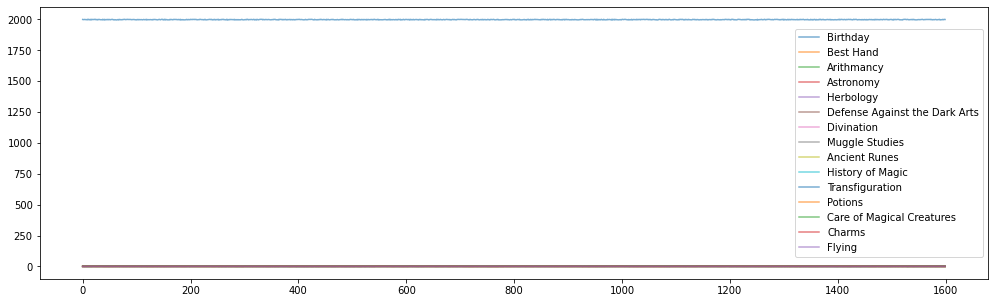

In [240]:
df.iloc[0:,1:].plot(figsize=(17,5), alpha=0.6)

In [241]:
houses = df['Hogwarts House'].unique()
houses

array(['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff'], dtype=object)

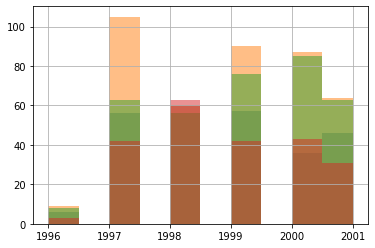

In [242]:
fig1 =df.groupby('Hogwarts House')['Birthday'].hist(alpha=0.5)

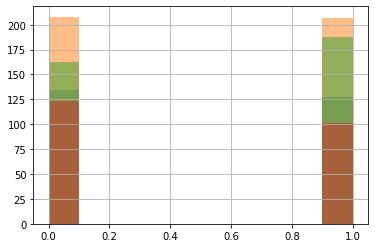

In [243]:
fig1 =df.groupby('Hogwarts House')['Best Hand'].hist(alpha=0.5)

As we see, the date of birth doesn't seem to be a determining feature, so we can drop them.

In [244]:
df = df.drop(['Birthday','Best Hand','First Name','Last Name'], axis=1)

In [245]:
df

,Index,Hogwarts House,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,0.639887,0.241486,0.778094,0.758514,0.716936,0.616003,0.538679,0.672324,0.708932,0.431946,0.632571,0.793213,0.335649
1,1,Slytherin,0.708357,0.209123,0.209214,0.790877,0.166054,0.260548,0.181768,0.617016,0.810917,0.633512,0.534573,0.248862,0.147696
2,2,Ravenclaw,0.371712,0.302914,0.875112,0.697086,0.792526,0.799895,0.690568,0.589872,0.966075,0.719760,0.439286,0.946253,0.460090
3,3,Gryffindor,0.441033,0.839396,0.184459,0.160604,0.679834,0.237302,0.520257,0.178215,0.073278,0.258934,0.517978,0.117970,0.829700
5,5,Slytherin,0.352435,0.178044,0.291683,0.821956,0.113812,0.282240,0.243393,0.679667,0.778445,0.895932,0.684995,0.367859,0.318713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,0.567396,0.666189,0.279415,0.333811,0.769177,0.255916,0.724445,0.157444,0.306615,0.408558,0.418148,0.299121,0.797542
1596,1596,Slytherin,0.677868,0.672871,0.794308,0.327129,0.558878,0.187558,0.350918,0.525039,0.796025,0.550547,0.467757,0.410483,0.491315
1597,1597,Gryffindor,0.682577,0.761874,0.344418,0.238126,0.788528,0.308382,0.761260,0.120411,0.251496,0.310684,0.531417,0.264231,0.824988
1598,1598,Hufflepuff,0.828008,0.716314,0.667163,0.283686,0.824404,0.099338,0.215752,0.602546,0.965334,0.438575,0.436688,0.417122,0.227255


## Logistic Regression
Visualizing data

In [246]:
dic = {
    'Ravenclaw':0,
    'Slytherin':1,
    'Gryffindor':2,
    'Hufflepuff':3
}

In [274]:
X = df.iloc[:, 2:] #values
Y = df['Hogwarts House'].map(dic)
lr = LogisticRegression(C=1)
df_test = pd.read_csv('./datasets/dataset_test.csv')
df_test = df_test.dropna(how='all').fillna(value=0)
lr.fit(X,Y)
X_test = df_test.iloc[:,6:]
X_test
Y_pred = lr.predict(X_test)


In [248]:
Y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,

In [256]:

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

ValueError: key of type tuple not found and not a MultiIndex